In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('global-data-on-sustainable-energy.csv')

In [4]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


# Phase 1: Understanding the Grid (Data Cleaning)

## 1. You inspect how many observations are available and confirm the shape.

In [5]:
print(f'The number of observations are: {len(df)}')
print(f'The shape of the data is: {df.shape}')

The number of observations are: 3649
The shape of the data is: (3649, 21)


## 2. To determine processing strategy, you check how many columns are numeric vs categorical.

In [6]:
print(df.dtypes.value_counts())

float64    18
object      2
int64       1
Name: count, dtype: int64


## 3. You standardize messy column names into snake_case to improve code readability.

In [7]:
df.columns = df.columns.str.lower()
df.columns = df.columns.map(lambda x : x.replace('-', '_').replace(' ', '_'))

## 4. You identify columns with excessive missing data that could compromise analysis.

In [25]:
df.isnull().sum().sort_values(ascending=False)

renewables_(%_equivalent_primary_energy)                            2137
financial_flows_to_developing_countries_(us_$)                      2089
renewable_electricity_generating_capacity_per_capita                 931
value_co2_emissions_kt_by_country                                    428
gdp_growth                                                           317
gdp_per_capita                                                       282
energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)          207
renewable_energy_share_in_the_total_final_energy_consumption_(%)     194
access_to_clean_fuels_for_cooking                                    169
electricity_from_nuclear_(twh)                                       126
low_carbon_electricity_(%_electricity)                                42
electricity_from_renewables_(twh)                                     21
electricity_from_fossil_fuels_(twh)                                   21
access_to_electricity_(%_of_population)            

## 5. You eliminate rows that contain too many unknowns and can’t be rescued.

In [139]:
max_unknowns = df.isnull().sum().max()
unknown_columns = df.isnull().sum()[df.isnull().sum() == max_unknowns]

for col in df.columns:
    if col == unknown_columns.index:
        column = col
df[column].dropna()

42      0.053235
43      0.065218
44      0.051677
45      0.228104
46      0.206787
          ...   
3560    3.567936
3561    3.972285
3562    2.927033
3563    3.197033
3564    2.523421
Name: Renewables (% equivalent primary energy), Length: 1512, dtype: float64

## 6. You decide to fill missing numeric values with column-wise averages to retain continuity.

In [141]:
averages = df.select_dtypes(include='number').mean()

In [149]:
df = df.select_dtypes(include='number').fillna(value=averages)

## 7. You find that some year entries are stored as floats and need correcting.

In [164]:
df['year'] = df['year'].astype('int64')

## 8. You check if duplicate rows exist, as they might skew averages and counts.

In [171]:
df[df.duplicated()].count()

year                                                                0
access_to_electricity_(%_of_population)                             0
access_to_clean_fuels_for_cooking                                   0
renewable_electricity_generating_capacity_per_capita                0
financial_flows_to_developing_countries_(us_$)                      0
renewable_energy_share_in_the_total_final_energy_consumption_(%)    0
electricity_from_fossil_fuels_(twh)                                 0
electricity_from_nuclear_(twh)                                      0
electricity_from_renewables_(twh)                                   0
low_carbon_electricity_(%_electricity)                              0
primary_energy_consumption_per_capita_(kwh/person)                  0
energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)         0
value_co2_emissions_kt_by_country                                   0
renewables_(%_equivalent_primary_energy)                            0
gdp_growth          

# Phase 2: Energy Benchmarks (Descriptive Insights)

## 9. You summarize global electricity access in 2020 to understand how many people still lack power.

#### Inference drawn: From the data we can see that till year 2020 about 15% of population still don't have access to electricity

In [176]:
df[df['year'] == 2020]['access_to_electricity_(%_of_population)'].mean()

85.46007794457142

## 10. You identify the wealthiest nations in 2015 based on GDP per capita for economic comparisons

In [193]:
wealthiest_nations = df.loc[df['year']==2015].sort_values(by='gdp_per_capita',ascending=False)

## 11. You're asked to report which country had the most carbon-intensive footprint in 2005.

In [194]:
most_carbon_intensive = df.loc[df['year'] == 2005].sort_values(by='value_co2_emissions_kt_by_country', ascending=False)

## 12. For fossil fuel policies, policymakers ask for min, max, and median fossil electricity values in 2010.

In [198]:
fossil_fuel_policies = df.loc[df['year'] == 2010]['electricity_from_fossil_fuels_(twh)'].agg(['min','max','median'])

In [196]:
df.columns

Index(['year', 'access_to_electricity_(%_of_population)',
       'access_to_clean_fuels_for_cooking',
       'renewable_electricity_generating_capacity_per_capita',
       'financial_flows_to_developing_countries_(us_$)',
       'renewable_energy_share_in_the_total_final_energy_consumption_(%)',
       'electricity_from_fossil_fuels_(twh)', 'electricity_from_nuclear_(twh)',
       'electricity_from_renewables_(twh)',
       'low_carbon_electricity_(%_electricity)',
       'primary_energy_consumption_per_capita_(kwh/person)',
       'energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)',
       'value_co2_emissions_kt_by_country',
       'renewables_(%_equivalent_primary_energy)', 'gdp_growth',
       'gdp_per_capita', 'land_area(km2)', 'latitude', 'longitude'],
      dtype='object')

## 13. You highlight the country that led in renewable electricity capacity in 2020.

In [201]:
renewable_electricity_leading = df.loc[df['year'] == 2010].sort_values(by='renewable_electricity_generating_capacity_per_capita', ascending=False).head(1)

# Phase 3: Patterns Over Time

In [202]:
import pandas as pd
import numpy as np

np.random.seed(3649)

countries = ["India", "Germany", "Brazil", "Kenya", "USA", "China"]
years = list(range(2000, 2023))

# Create country-year combinations
grid = pd.MultiIndex.from_product([countries, years], names=["country", "year"]).to_frame(index=False)
n = len(grid)

df_synthetic = pd.DataFrame({
    "country": grid["country"],
    "year": grid["year"],
    "gdp_per_capita": np.round(np.random.normal(15000, 8000, size=n), 2),
    "gdp_growth": np.round(np.random.normal(2.5, 1.2, size=n), 2),
    "population": np.random.randint(5e6, 1400e6, size=n),
    "value_co2_emissions_kt_by_country": np.round(np.random.normal(250000, 100000, size=n), 2),
    "renewable_energy_share_in_total_final_energy_consumption": np.round(np.random.uniform(10, 85, size=n), 2),
    "electricity_from_renewables": np.round(np.random.uniform(20, 800, size=n), 2), # TWh
    "electricity_from_fossil_fuels": np.round(np.random.uniform(50, 1800, size=n), 2), # TWh
    "electricity_from_nuclear": np.round(np.random.uniform(0, 400, size=n), 2),
})

In [203]:
df_synthetic

,country,year,gdp_per_capita,gdp_growth,population,value_co2_emissions_kt_by_country,renewable_energy_share_in_total_final_energy_consumption,electricity_from_renewables,electricity_from_fossil_fuels,electricity_from_nuclear
0,India,2000,17542.72,3.95,57494374,184875.83,78.36,25.87,1188.77,385.27
1,India,2001,20778.19,1.04,402004166,315717.74,43.31,258.73,434.26,114.23
2,India,2002,21971.31,3.71,41968111,87539.40,22.90,431.98,510.44,17.20
3,India,2003,22038.34,2.37,261682411,180229.42,30.91,180.13,1582.42,315.07
4,India,2004,22488.90,1.89,281015632,205692.48,23.08,624.38,1449.91,326.49
...,...,...,...,...,...,...,...,...,...,...
133,China,2018,23690.47,2.46,1265989103,291906.90,34.63,569.52,1366.48,235.42
134,China,2019,7957.79,2.29,627526801,147992.27,50.32,186.16,318.20,136.13
135,China,2020,19698.63,2.36,1082882546,342236.97,52.76,456.57,1246.88,350.85
136,China,2021,16909.99,3.99,1006559575,78621.34,43.46,445.01,1417.98,160.00


## 14. Merge economic and energy data to evaluate wealth vs sustainability

Task: You have one table summarizing economic indicators (GDP, population), and another with energy metrics. Combine them by country and year to produce a unified dataset for analysis.

In [214]:
merged_df = pd.merge(left = df, right = df_synthetic, on = 'year', suffixes=['_df','_synthetic'])

## 15. Inner join emissions data with renewable share table to isolate complete records only

Task: You're asked to assess renewable adoption vs emissions — but only for countries with complete values in both. Use an inner join to exclude partial records and analyze correlations.

In [228]:
concatenated_df = pd.concat([df, df_synthetic], join='inner', axis=1)

## 16. Use concat to append newer years of data to your master table

Task: A new spreadsheet arrives containing 2021–2022 metrics. Concatenate these rows into your cleaned dataset while ensuring column consistency and preserving index integrity.

In [233]:
newer_years = pd.concat([df, df_synthetic[~np.in1d(df_synthetic['year'], df['year'])]], ignore_index=True)

## 17. Create a MultiIndex of (country, year) and slice data for high-resolution analysis

Task: You're building a panel-style report. Set a multi-level index to compare countries year-over-year, and extract time-series summaries using .loc[], .xs(), or level filtering.

In [248]:
indexed_synthetic_df = df_synthetic.set_index(['country','year'])
indexed_synthetic_df.xs('India')
indexed_synthetic_df.loc['India']

,gdp_per_capita,gdp_growth,population,value_co2_emissions_kt_by_country,renewable_energy_share_in_total_final_energy_consumption,electricity_from_renewables,electricity_from_fossil_fuels,electricity_from_nuclear
year,,,,,,,,
2000,17542.72,3.95,57494374,184875.83,78.36,25.87,1188.77,385.27
2001,20778.19,1.04,402004166,315717.74,43.31,258.73,434.26,114.23
2002,21971.31,3.71,41968111,87539.40,22.90,431.98,510.44,17.20
2003,22038.34,2.37,261682411,180229.42,30.91,180.13,1582.42,315.07
2004,22488.90,1.89,281015632,205692.48,23.08,624.38,1449.91,326.49
2005,27704.22,4.03,555929113,343893.80,20.09,336.67,1740.39,365.42
2006,11942.64,5.35,78984676,250711.29,71.60,240.76,1009.58,282.09
2007,22099.06,3.06,1203636053,386905.42,47.52,639.21,1777.33,223.67
2008,21921.36,1.04,337854409,214417.12,21.84,499.84,324.25,263.50


## 18. How efficiently each country deploys it per citizen

Task :International energy economists want to assess not just how much renewable electricity is produced, but how efficiently each country deploys it per citizen. They’re particularly focused on comparing solar, wind, and hydro output per capita across countries — spotlighting technological maturity and national scalability.

In [336]:
df_synthetic['efficiency'] = df_synthetic['renewable_energy_share_in_total_final_energy_consumption'] / df_synthetic['population']

# Phase 4: Targeted Filtering & Sorting (Smart Slicing)

## 19. You identify countries with nearly full electricity access but low carbon emissions—ideal performers.

In [304]:
max_electricity = merged_df[merged_df['access_to_electricity_(%_of_population)'] > 99]
min_emission = merged_df[merged_df['value_co2_emissions_kt_by_country_df'] == merged_df['value_co2_emissions_kt_by_country_df'].min()]
merged_consumption = pd.merge(max_electricity,min_emission,how='inner')

## 20. You rank countries by energy intensity in 2020 to flag high-demand profiles.

In [310]:
df_2020 = merged_df[merged_df['year'] == 2020]

In [315]:
df_2020 = df_2020.sort_values('energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)', ascending=False)
df_2020['rank'] = df_2020['country'].rank(method='dense')

## 21. You isolate historical records for three focus countries to build local dashboards.

In [319]:
isolated_records = merged_df[merged_df['country'].isin(['India','USA','China'])]

## 22. You highlight the top 10 countries by GDP per capita as targets for economic partnerships.

In [325]:
top_10 = merged_df.sort_values('gdp_per_capita_df', ascending=False).groupby('country').head(10)

## 23. You reset indices after filtering to keep output presentation clean and usable.

In [326]:
resetting = merged_df.set_index('country')

In [333]:
filtering = resetting.loc['India']
filtering.reset_index()

,country,year,access_to_electricity_(%_of_population),access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries_(us_$),renewable_energy_share_in_the_total_final_energy_consumption_(%),electricity_from_fossil_fuels_(twh),electricity_from_nuclear_(twh),electricity_from_renewables_(twh),...,latitude,longitude,gdp_per_capita_synthetic,gdp_growth_synthetic,population,value_co2_emissions_kt_by_country_synthetic,renewable_energy_share_in_total_final_energy_consumption,electricity_from_renewables,electricity_from_fossil_fuels,electricity_from_nuclear
0,India,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,33.939110,67.709953,17542.72,3.95,57494374,184875.83,78.36,25.87,1188.77,385.27
1,India,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,33.939110,67.709953,20778.19,1.04,402004166,315717.74,43.31,258.73,434.26,114.23
2,India,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,33.939110,67.709953,21971.31,3.71,41968111,87539.40,22.90,431.98,510.44,17.20
3,India,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,33.939110,67.709953,22038.34,2.37,261682411,180229.42,30.91,180.13,1582.42,315.07
4,India,2004,20.064968,10.9,7.75,94224000.0,44.24,0.33,0.0,0.56,...,33.939110,67.709953,22488.90,1.89,281015632,205692.48,23.08,624.38,1449.91,326.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,India,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,-19.015438,29.154857,19952.65,4.23,75155980,333228.06,15.78,236.47,1419.90,271.84
3645,India,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,-19.015438,29.154857,19003.01,4.15,959327028,401586.32,35.64,229.09,144.46,16.76
3646,India,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,-19.015438,29.154857,13655.94,1.18,1322376599,296459.97,37.38,208.31,1112.51,330.01
3647,India,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,-19.015438,29.154857,15123.79,3.86,761184203,218497.38,31.93,557.59,283.09,347.93


# Phase 5: Visual Storytelling (Distribution, Trends, Subplots)

## - Distributions & Trends

## 24. You plot a histogram to explore how CO₂ emissions vary globally.

#### Interpretation: From the graph we can see that kenya and germany have the highest CO₂ emissions

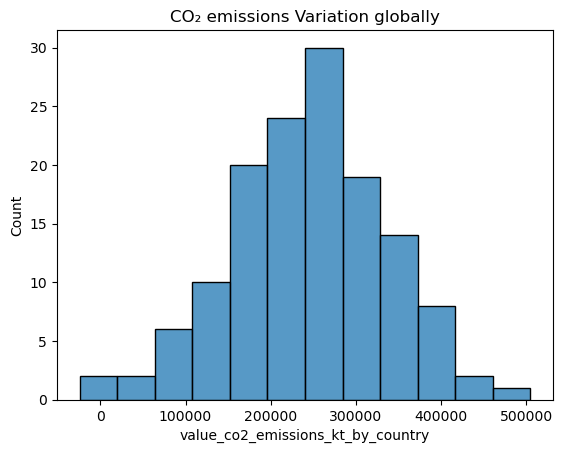

<Figure size 640x480 with 0 Axes>

In [407]:
sns.histplot(data=df_synthetic,x='value_co2_emissions_kt_by_country')
plt.title('CO₂ emissions Variation globally')
plt.show()
plt.savefig('CO₂ emissions')

## 25. You use a KDE curve to show the distribution of renewable shares.

#### Interpretation: We can interpret that as the renewable shares percent increase it use decreases

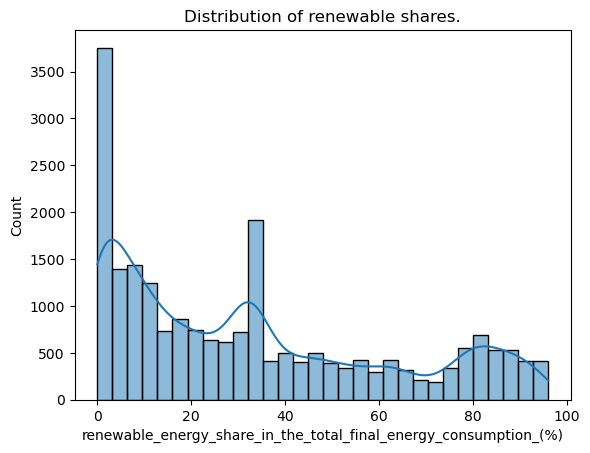

<Figure size 640x480 with 0 Axes>

In [408]:
sns.histplot(data=merged_df,x='renewable_energy_share_in_the_total_final_energy_consumption_(%)',kde=True)
plt.title('Distribution of renewable shares.')
plt.show()
plt.savefig('Distribution of renewable shares')

## 26. You compare renewable growth trajectories over time for three nations.

#### Interpretation: We can see that for each country a specific peak is achieved and then again the renewable growth falls back to min

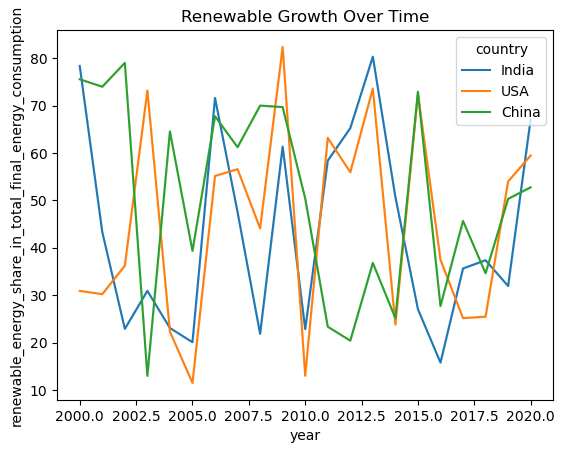

<Figure size 640x480 with 0 Axes>

In [409]:
sns.lineplot(data=isolated_records, x='year', y='renewable_energy_share_in_total_final_energy_consumption',hue='country')
plt.title('Renewable Growth Over Time')
plt.show()
plt.savefig('Renewable Growth Over Time')

## 27. You visualize average GDP per capita for the top 10 countries.